# $$\text{Modelo de dividendos continuos}$$

# Introducción al Modelo de Dividendos Continuos en Activos Financieros: Estudio de Caso Microsoft (2019-2023)

En el dinámico mundo de las inversiones, la comprensión de cómo los dividendos influyen en el comportamiento de las acciones es esencial para los inversores y analistas financieros. Los dividendos, como flujos de efectivo distribuidos por una empresa a sus accionistas, desempeñan un papel crucial en la valoración y rendimiento de las acciones. Modelar el precio de una acción se convierte, entonces, en una tarea clave para aquellos que buscan comprender y anticipar el rendimiento de sus inversiones.

La importancia de modelar el precio de una acción radica en la capacidad de prever los movimientos del mercado y evaluar la rentabilidad de una inversión. Aquí es donde entra en juego el modelo de dividendos continuos en activos financieros. Este modelo ofrece una herramienta matemática poderosa para describir la dinámica de los precios de las acciones que generan flujos de efectivo constantes a través de dividendos.

Consideraremos este modelo aplicado a la acción de Microsoft, una de las empresas líderes en tecnología, durante el período comprendido entre 2018 y 2023. La ecuación diferencial estocástica asociada con este modelo se convierte en una guía valiosa para entender la evolución de los precios de las acciones de Microsoft en un entorno caracterizado por la incertidumbre. La inclusión del término estocástico, representado por el proceso de Wiener (\(dW\)), refleja la naturaleza aleatoria e impredecible de los mercados financieros.

El cálculo estocástico desempeña un papel crucial al modelar activos financieros, ya que permite capturar la variabilidad inherente a los movimientos de precios. La volatilidad (\(\sigma\)) y la tasa de rendimiento esperada (\(r\)) ofrecen dimensiones adicionales a la ecuación, influyendo en la velocidad y dirección de los cambios en el precio de la acción.

En este proyecto, exploramos a fondo la ecuación diferencial asociada con el modelo de dividendos continuos:

$$ dS_t = (r - \delta)S_t dt + \sigma S_t dW_t $$

Abordaremos el significado de cada parámetro y su relevancia en el contexto financiero de una de las empresas más destacadas del sector tecnológico. Además, analizaremos cómo la simulación estocástica, el Método de Milstein y la resolución analítica pueden proporcionar herramientas valiosas para comprender y predecir el comportamiento de los activos financieros de Microsoft en presencia de dividendos continuos. Este enfoque integral nos permitirá no solo modelar la realidad de los mercados, sino también aprovechar las oportunidades que surgen en un entorno financiero dinámico y cambiante.

Para la simulacion de nuestro proceso, exploramos en profundidad el significado de los parámetros clave de la ecuación diferencial. 

La tasa de interes libre de riesgo. $(r)$, fue obtenida basandonos en los rendimientos historicos otorgados por el gobierno de Mexico en los ultimos años

La tasa de dividendos continua $(\delta)$ fue el promedio de los 20 dividendos otorgados por la empresa en el intervalo de tiempo de 15 de agosto de 2018 y el 17 de Mayo de 2023
$$
\text{Tasa de dividendos} = \frac{1}{N} \sum_{i=1}^{N} D_i
$$

La volatilidad $(\sigma)$ fue obtenida atraves de realizar una estimación por máxima verosimilitud, en donde:
$$
    \text{Volatilidad} = \sqrt{\frac{(n-1)}{n} s^2}  $$


## Solución del modelo

### $$ dS_t = (\alpha - \beta) S_t \, dt + \sigma S_t \, dW_t $$
donde
- $\alpha$ es la tasa libre de riesgo
- $\beta$ es la tasa de dividendos continua
- $\sigma$ es la volatilidad del precio
- $S_t$ es el precio en el momento $t$
- $W_t$ es un proceso de Wiener estándar

### $\text{Solución}$

#### Sea $Y_t = ln(S_t)$, haciendo uso del lemma de Itô, se tiene que
- $f(x, t) = ln(x)$
- $\frac{\partial f}{\partial t} = 0$
- $\frac{\partial f}{\partial x} = \frac{1}{x}$
- $\frac{\partial^2 f}{\partial x^2} = -\frac{1}{x^2}$
- $\mu' = (\alpha - \beta)S_t$
- $\sigma' = \sigma S_t$

Ahora, 
$$d(Y_t) = d(ln(S_t) = \left(\frac{\partial f(S_t, t)}{\partial t} + \mu' \cdot \frac{\partial f(S_t, t)}{\partial x} + \frac{{\sigma'}^2}{2} \cdot \frac{\partial^2 f(S_t, t)}{\partial x^2} \right)dt + \left(\sigma' \cdot \frac{\partial f(S_t, t)}{\partial x}\right) dW_t$$

$$= \left(0 + (\alpha - \beta) S_t \cdot \frac{1}{S_t} + \frac{\sigma^2}{2}  S_t^2 \cdot \frac{-1}{S_t^2}\right) dt + \left(\sigma S_t \cdot \frac{1}{S_t}\right) dW_t$$

$$= \left(\alpha - \beta  - \frac{\sigma^2}{2}  \right) dt + \sigma dW_t$$

Integrando ambos lados de la ecuación se obtiene:

$$\int_{0}^{t} d(ln(S_t) =  \int_{0}^{t} \left(\alpha - \beta  - \frac{\sigma^2}{2}  \right) dt + \int_{0}^{t} \sigma dW_t$$

donde:
- $\int_{0}^{t} d(ln(S_t) = ln(S_t)\Big|_0^t = ln(S_t) - ln(S_0)$
- $\int_{0}^{t} \left(\alpha - \beta  - \frac{\sigma^2}{2}  \right) dt = \left(\alpha - \beta - \frac{\sigma^2}{2}  \right) t \Big|_0^t =  \left(\alpha - \beta - \frac{\sigma^2}{2}  \right) t$
- $\int_{0}^{t} \sigma dW_t = \sigma (W_t - W_0) = \sigma W_t$

por lo que 
$$ ln(S_t) = ln(S_0) + \left(\alpha - \beta - \frac{\sigma^2}{2}  \right) t + \sigma W_t$$

$$\implies S_t = S_0 \cdot e^{ \left((\alpha - \beta) - \frac{\sigma^2}{2}\right)t + \sigma W_t}$$

### $\text{Media}$

$$
\mathbb{E}(S_t) = \mathbb{E}\left[ S_0 \cdot e^{\left((\alpha - \beta) - \frac{\sigma^2}{2}\right)t + \sigma W_t} \right]
$$

$$
\mathbb{E}(S_t) = S_0 \cdot e^{\left((\alpha - \beta) - \frac{\sigma^2}{2}\right)t} \mathbb{E}[e^{(\sigma W_t)}]
$$

$$
\mathbb{E}(S_t) = S_0 \cdot e^{\left((\alpha - \beta) - \frac{\sigma^2}{2}\right)t + \frac{\sigma^2 \cdot t}{2}}
$$

$$
\mathbb{E}(S_t) = S_0 \cdot e^{\left(\alpha - \beta \right)t}
$$

### $\text{Varianza}$

$$
\text{Var}(S_t) = \text{Var}\left( S_0 \cdot e^{\left((\alpha - \beta) - \frac{\sigma^2}{2}\right)t + \sigma W_t} \right)
$$

$$
\text{Var}(S_t) = \mathbb{E}\left( S_0^2 \cdot e^{2\left((\alpha - \beta) - \frac{\sigma^2}{2}\right)t + 2\sigma W_t} \right) 
- \mathbb{E}\left(S_0 \cdot e^{ \left((\alpha - \beta) - \frac{\sigma^2}{2}\right)t + \sigma W_t} \right)^2
$$

$$
\text{Var}(S_t) = \mathbb{E}\left( S_0^2 \cdot e^{2\left((\alpha - \beta) - \frac{\sigma^2}{2}\right)t + 2\sigma W_t} \right) 
- (S_0 \cdot e^{\left(\alpha - \beta \right) \cdot t})^2
$$


$$
\text{Var}(S_t) = S_0^2 \cdot e^{2(\alpha - \beta)\cdot t - \frac{2\sigma^2}{2}t} \cdot \mathbb{E} \left( e^{2\sigma W_t}\right) - S_0^2 \cdot e^{2(\alpha - \beta)t}
$$

$$
\text{Var}(S_t) = S_0^2 \cdot e^{2(\alpha - \beta)\cdot t - \frac{2\sigma^2}{2}t} \cdot  \left( e^{\frac{4\sigma t^2}{2}}\right) - S_0^2 \cdot e^{2(\alpha - \beta)t}
$$

$$
\text{Var}(S_t) = S_0^2 \cdot e^{2(\alpha - \beta)\cdot t - \sigma^2 t + 2\sigma^2 t}
- S_0^2 \cdot e^{2(\alpha - \beta)t}
$$

$$
\text{Var}(S_t) = S_0^2 \cdot e^{2(\alpha - \beta)\cdot t + \sigma^2 t}
- S_0^2 \cdot e^{2(\alpha - \beta)t}
$$

$$
\text{Var}(S_t) = S_0^2 \cdot e^{2(\alpha - \beta)t} \cdot \left(e^{\sigma^2 t} - 1 \right)
$$

In [250]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math
import pandas as pd
import random
import yfinance
import time
import matplotlib.colors as mcolors

In [251]:
class normal:
    def __init__(self, miu, sigma):
        self.a = miu
        self.b = sigma

    def random(self):
        u1 = random.random()
        u2 = random.random()
        v1 = 2 * u1 - 1
        v2 = 2 * u2 - 1
        B = v1**2 + v2**2
        while B > 1:
            u1 = random.random()
            u2 = random.random()
            v1 = 2 * u1 - 1
            v2 = 2 * u2 - 1
            B = v1**2 + v2**2
        z1 = math.sqrt(-2 * math.log(B) / B) * v1 * self.b + self.a
        z2 = math.sqrt(-2 * math.log(B) / B) * v2 * self.b + self.a
        return [z1, z2]

    def randoms(self, n):
        v = []
        k = n % 2
        if k == 1:
            for i in range(0, n // 2):
                v.extend(self.random())
            v.append(self.random()[0])
        else:
            for i in range(0, n // 2):
                v.extend(self.random())
        return v

In [252]:
class SDE:
#     params: parametros iniciales en un diccionario
#     s0: valor inicial del proceso
#     mu, sigma: deriva y difución en sympy

    def __init__(self, parametros, s0, mu, sigma):
        self.parametros = parametros
        self.s0 = s0
        self.mu = mu
        self.sigma = sigma
    
    def euler(self, T, n, n_simulaciones):
        plt.figure(figsize=(15, 5))
        dt = T / n
        
        trayectorias = []
        for j in range(n_simulaciones):
            valores = normal(0, 1).randoms(n)
            proceso = [self.s0]
            valores_dt = [dt]
            s0_sim = self.s0
            delta_t = dt

            for i in range(1, len(valores)):
                si = s0_sim + mu.subs({**parametros, S:s0_sim, t:delta_t})*dt + sigma.subs({**parametros, S:s0_sim, t:delta_t})*valores[i]*np.sqrt(dt)
                proceso.append(si)
                s0_sim = si
                delta_t += dt
                valores_dt.append(dt*(i+1))
            x = np.arange(1, len(proceso)+1)
            
            trayectorias.append(proceso)
            plt.plot(valores_dt, proceso)
        
        plt.title('Euler simulation', fontsize=16)
        plt.xlabel('Tiempos', fontsize=12)
        plt.ylabel('Precio', fontsize=12)
        plt.grid()
        return trayectorias

        
    def milstein(self, T, n, n_simulaciones):
        plt.figure(figsize=(15, 5))
        dt = T / n
        trayectorias = []
        for j in range(n_simulaciones):
            valores = normal(0, 1).randoms(n)
            proceso = [self.s0]
            valores_dt = [dt]
            s0_sim = self.s0
            delta_t = dt
            for i in range(1, len(valores)):
                si = s0_sim + mu.subs({**parametros, S:s0_sim,  t:delta_t})*dt + sigma.subs({**parametros, S:s0_sim,  t:delta_t})*valores[i]*np.sqrt(dt) + 1/2 * sp.diff(sigma, S).subs({**parametros, S:s0_sim, t:delta_t}) * sigma.subs({**parametros, S:s0_sim, t:delta_t}) * dt * (valores[i]**2 - 1)          
                proceso.append(si)
                s0_sim = si
                delta_t += dt
                valores_dt.append(dt*(i+1))
            x = np.arange(1, len(proceso)+1)
            trayectorias.append(proceso)
            plt.plot(valores_dt, proceso)
            
        plt.title('Milstein simulation', fontsize=16)
        plt.xlabel('Tiempos', fontsize=12)
        plt.ylabel('Precio', fontsize=12)
        plt.grid()
        return trayectorias

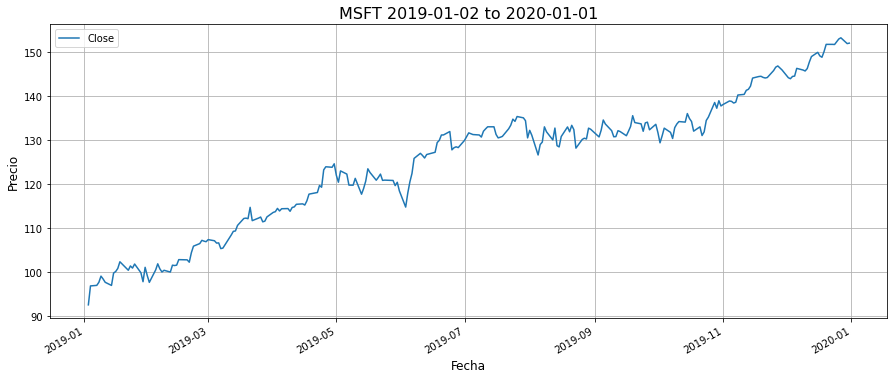

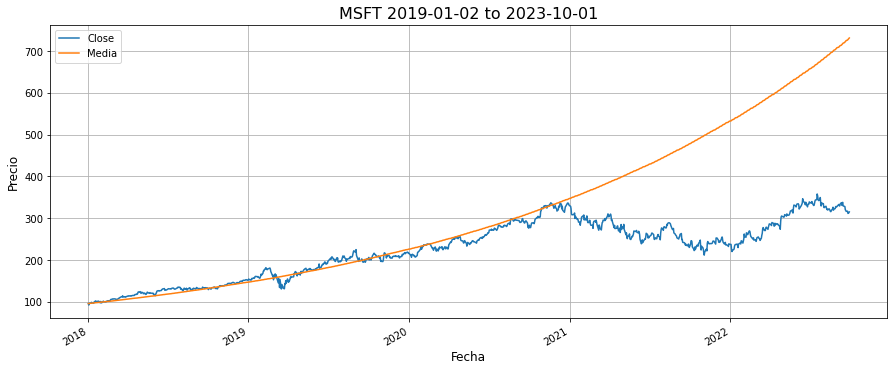

In [253]:
start = "2019-01-01"
end = "2020-01-01"
ticker = 'MSFT'

company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)
datos_company['log_returns'] = np.log(datos_company['Close'] / datos_company['Close'].shift(1))
inicio_ = datos_company.index[0].strftime('%Y-%m-%d')
datos_company = datos_company.drop(datos_company.index[0])
n_retornos = len(datos_company.index)
mu_est = 0.002
beta_est = 0.0003

datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)
s0 = precios[0]

ax1 = datos.plot(figsize=(15, 6))
ax1.set_title(ticker + ' ' + inicio_ + ' to ' + end, fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True)
ax1.legend()


end = "2023-10-01"
company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)

datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)
s0 = precios[0]

def media(s0, a, b, t):
    muu = a - b
    return s0*np.exp((muu)*t)

ggg = media(s0, mu_est, beta_est, np.arange(0, dias))
dff = pd.DataFrame(index=fechas)
dff['Media'] = ggg

ax1 = datos.plot(figsize=(15, 6))
dff.plot(ax=ax1, figsize=(15, 6))
ax1.set_title(ticker + ' ' + inicio_ + ' to ' + end, fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True)
ax1.legend()

## Simulaciones para el año 2021

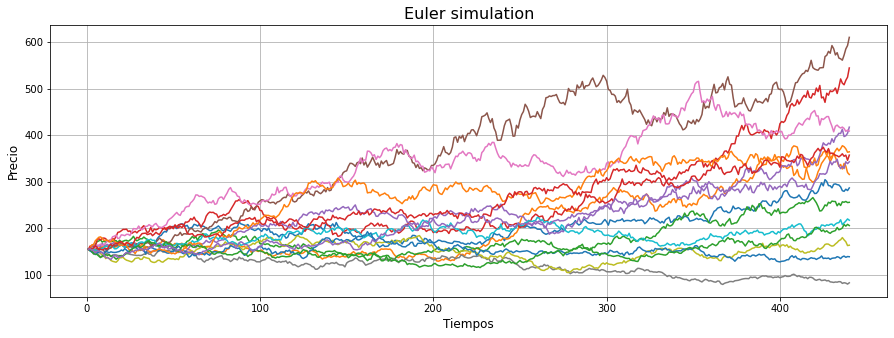

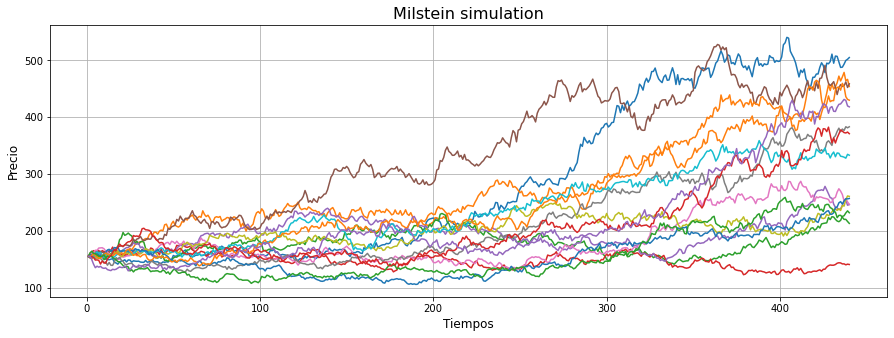

In [254]:
aasim = "2019-01-01"
bbsim = "2020-01-03"
ticker = 'MSFT'

company = yfinance.Ticker(ticker)
datos_company = company.history(start=aasim, end=bbsim)
datos_company['log_returns'] = np.log(datos_company['Close'] / datos_company['Close'].shift(1))
inicio_ = datos_company.index[0].strftime('%Y-%m-%d')
datos_company = datos_company.drop(datos_company.index[0])
n_retornos = len(datos_company.index)
datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
s0 = precios[-1]

a, b, c , S, t = sp.symbols('a, b, c, S, t')
mu = (a-b)*S
sigma = c*S
sigma_est = 0.02
mu_est = 0.002
beta_est = 0.0003
parametros = {a: mu_est, b: beta_est, c: sigma_est} 
modelo = SDE(parametros, s0, mu, sigma)
tra1 = modelo.euler(440, 440, 15)
tra2 = modelo.milstein(440, 440, 15)


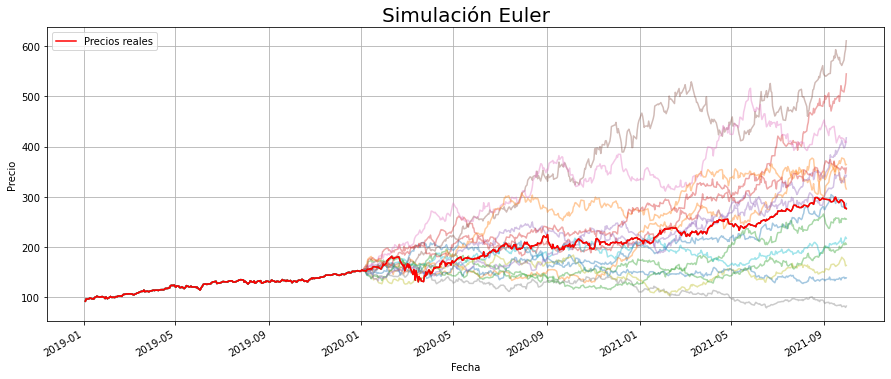

In [260]:
start = "2019-01-01"
end = "2021-10-01"
ticker = 'MSFT'

company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)
datos_company['log_returns'] = np.log(datos_company['Close'] / datos_company['Close'].shift(1))
inicio_ = datos_company.index[0].strftime('%Y-%m-%d')
datos_company = datos_company.drop(datos_company.index[0])
n_retornos = len(datos_company.index)
datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)

# Initialize a single plot
fig, ax = plt.subplots(figsize=(15, 6))

for i in range(len(tra1)):
    
    aa = "2019-01-01"
    bb = "2020-01-03"
    ticker = 'MSFT'
    
    company = yfinance.Ticker(ticker)
    datos_company = company.history(start=aa, end=bb)
    datos_company['log_returns'] = np.log(datos_company['Close'] / datos_company['Close'].shift(1))
    inicio_ = datos_company.index[0].strftime('%Y-%m-%d')
    datos_company = datos_company.drop(datos_company.index[0])
    n_retornos = len(datos_company.index)
    datoss = pd.DataFrame(datos_company['Close'], datos_company.index)
    precioss = datos_company['Close'].values
    precios_2019 = datoss['Close'].values
    s0 = precios_2019[-1]

        
    datssss = list(precios_2019) + tra1[i] 
    datos['plotear'] = np.array(datssss).astype(float)
    datos_plotear = pd.DataFrame(datos['plotear'].values, fechas)

    datos_plotear.plot(ax=ax)
    colors = list(mcolors.TABLEAU_COLORS.values())  
lighter_colors = [mcolors.to_rgba(color, alpha=0.4) for color in colors]  

for i, line in enumerate(ax.get_lines()):
    line.set_color(lighter_colors[i % len(lighter_colors)]) 

    

#     real = pd.DataFrame(datos['Close'].values, fechas)
real = pd.DataFrame(columns=[ 'Precios reales'])
real['Precios reales'] = datos['Close']
# real['fechas'] = datos.index
real['Precios reales'].plot(ax=ax)    
ax.legend().remove()
real.plot(ax=ax, color='red')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio')
ax.set_title('Simulación Euler', fontsize=20)
ax.grid()
plt.show()

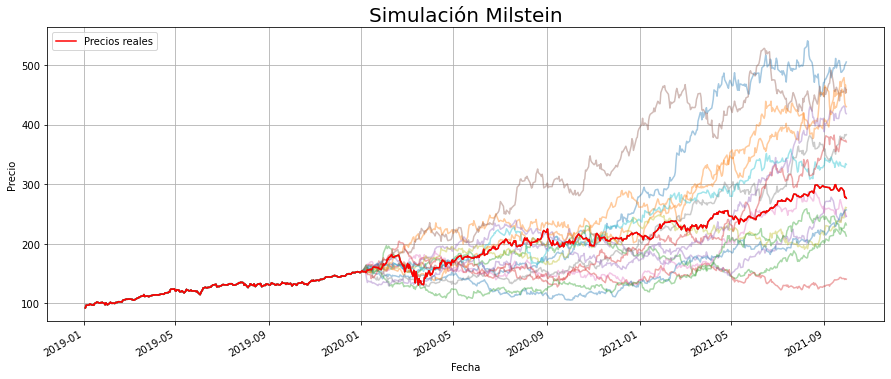

In [256]:
start = "2019-01-01"
end = "2021-10-01"
ticker = 'MSFT'

company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)
datos_company['log_returns'] = np.log(datos_company['Close'] / datos_company['Close'].shift(1))
inicio_ = datos_company.index[0].strftime('%Y-%m-%d')
datos_company = datos_company.drop(datos_company.index[0])
n_retornos = len(datos_company.index)
datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)

# Initialize a single plot
fig, ax = plt.subplots(figsize=(15, 6))

for i in range(len(tra2)):
    
    aa = "2019-01-01"
    bb = "2020-01-03"
    ticker = 'MSFT'
    
    company = yfinance.Ticker(ticker)
    datos_company = company.history(start=aa, end=bb)
    datos_company['log_returns'] = np.log(datos_company['Close'] / datos_company['Close'].shift(1))
    inicio_ = datos_company.index[0].strftime('%Y-%m-%d')
    datos_company = datos_company.drop(datos_company.index[0])
    n_retornos = len(datos_company.index)
    datoss = pd.DataFrame(datos_company['Close'], datos_company.index)
    precioss = datos_company['Close'].values
    precios_2019 = datoss['Close'].values
    s0 = precios_2019[-1]

        
    datssss = list(precios_2019) + tra2[i] 
    datos['plotear'] = np.array(datssss).astype(float)
    datos_plotear = pd.DataFrame(datos['plotear'].values, fechas)

    datos_plotear.plot(ax=ax)
    colors = list(mcolors.TABLEAU_COLORS.values())  
lighter_colors = [mcolors.to_rgba(color, alpha=0.4) for color in colors]  

for i, line in enumerate(ax.get_lines()):
    line.set_color(lighter_colors[i % len(lighter_colors)]) 

    

#     real = pd.DataFrame(datos['Close'].values, fechas)
real = pd.DataFrame(columns=[ 'Precios reales'])
real['Precios reales'] = datos['Close']
# real['fechas'] = datos.index
real['Precios reales'].plot(ax=ax)    
ax.legend().remove()
real.plot(ax=ax, color='red')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio')
ax.set_title('Simulación Milstein', fontsize=20)
ax.grid()
plt.show()

## Comparación de la simulación con la solución exacta

In [265]:
import random as rm
import math as mt
import numpy as np
import matplotlib.pyplot as plt
n=755
t=755
p=1/2
N=1

deltat=1/n
deltax=mt.sqrt(deltat)
q=1-p
M=np.zeros((N,mt.floor(n*t)+1))
W0=0

for i in range(0,N):
    Wt=[W0]
    Wt.extend(np.cumsum(rm.choices([-1,1],[q,p],k=mt.floor(n*t)))*deltax)
    M[i,:]=Wt
media=np.mean(M,axis=0)
var=np.var(M,axis=0)
time=list(np.arange(0,mt.floor(n*t)+1)*deltat)
# plt.plot(time,M.T,color='lightgrey')
# plt.plot(time,media,color='m')
# plt.plot(time,var,color='b')
# plt.xlabel("t")
# plt.ylabel("Wt")
# plt.grid()
# plt.show

S0=100
M=0.002-0.0003
V=0.02

St=S0*np.exp(np.dot((M-(V**2)/2),time)+np.dot(V,Wt))

Text(0.5, 1.0, 'EXACTA vs EULER')

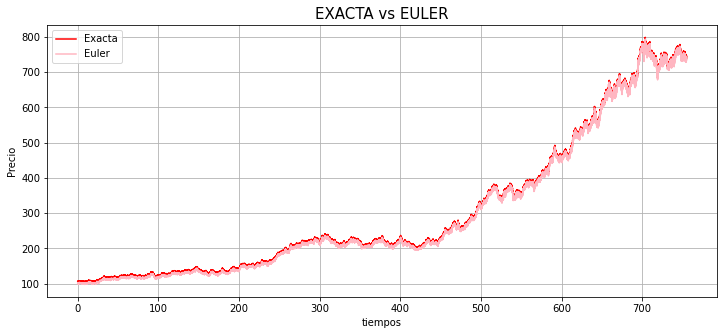

In [271]:
L=len(Wt)
Xt=np.zeros(L)
Xt[0]=S0
for i in range(0,L-1):
    Xt[i+1]=Xt[i]+M*Xt[i]*(time[i+1]-time[i])+V*Xt[i]*(Wt[i+1]-Wt[i])

plt.figure(figsize=(12, 5))
plt.plot(time,St+5,color='red', label='Exacta')
plt.plot(time,Xt,color='lightpink', label='Euler')
plt.xlabel("tiempos")
plt.ylabel("Precio")
plt.legend()
plt.grid()
plt.title('EXACTA vs EULER', fontsize=15)


Text(0.5, 1.0, 'EXACTA vs MILSTEIN')

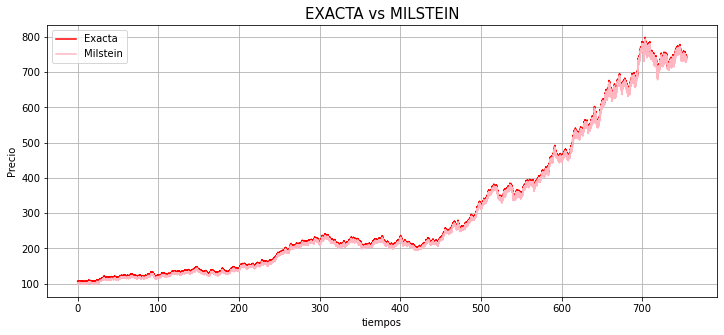

In [272]:
L=len(Wt)
Yt=np.zeros(L)
Yt[0]=S0
for i in range(0,L-1):
    Yt[i+1]=Yt[i]+M*Yt[i]*(time[i+1]-time[i])+V*Yt[i]*(Wt[i+1]-Wt[i])+1/2*(V**2 * (time[i+1]-time[i]) * ((Wt[i+1]-Wt[i])**2 / (time[i+1]-time[i]) - 1))

plt.figure(figsize=(12, 5))
plt.plot(time,St+5,color='red', label='Exacta')
plt.plot(time,Yt,color='lightpink', label='Milstein')
plt.xlabel("tiempos")
plt.ylabel("Precio")
plt.legend()
plt.grid()
plt.title('EXACTA vs MILSTEIN', fontsize=15)

Podemos observar que la solución exacta es prácticamente igual a las soluciones de Euler y Milstein

## Conclusiones

Con este proyecto pudimos ver que es crucial los años que escogemos para estimar los parámetros, ya que este tipo de acciones tienden a cambiar mucho su distribución con factores tanto internos como externos de gran relevancia, como lo puede ser un cambio en las tasas de las regulaciones bancarias, una adquisición, cambio de propietario, algún nuevo modelo o un evento mundial como una pandemia o una guerra. 
Calculando y modelando nuestros parámetros pudimos observar que un buen ajuste depende de una buena estimación de la media y varianza. Y más específicamente de la media, ya que la media es la única presente en el valor esperado del modelo, el cual nos es útil para comparar con los precios reales.
Al realizar estas comparaciones nos pudimos dar cuenta que en ciertos periodos nuestro modelo se acercó en una manera bastante significante a los precios reales de la acción en este caso de Microsoft, sin embargo hubo algunos otros periodos en los que nuestro modelo se mantuvo bastante alejado de los precios reales, lo que nos permite concluir que aunque el modelo de dividendos continuos puede llegar a ser de gran utilidad al momento de analizar alguna empresa, este puede llegar a ser muy simple o poco basto al momento de querer utilizarlo como nuestra principal herramienta para comprar o vender una acción.